<a href="https://colab.research.google.com/github/essiesalari/Image-Classification-CIFAR10_DL/blob/main/CIFAR10_Image_Classificatio__CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CIFAR10 Image Classification**

## Import Libraries and the Dataset

In [22]:
import numpy as np
import os
import time
import pickle
from tqdm import tnrange, tqdm_notebook
from IPython import display

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12, 5)

import tensorflow as tf
import tensorflow.keras
from tensorflow import keras
from tensorflow.keras import models, layers, activations
from keras.models import Model
from PIL import Image, ImageFilter
from keras import regularizers

In [ ]:
from tensorflow.keras.utils import get_file
origin_url = 'https://surfdrive.surf.nl/files/index.php/s/{key}/download'

# Dictionary mapping file names to download keys
files = {
    'cifar10-batch-1': '4Nee36XgbYjp3N6',
    'cifar10-batch-2': 'LVx85dLceKI5toF',
    'cifar10-batch-3': '4FoFmeKyXa5sYr0',
    'cifar10-batch-4': 'a4o2RatC0Fa3Exb',
    'cifar10-batch-5': 'eqBJRWdkRGk025k',
    'cifar10-test': 'nEf9Z4eg7iGmWGU'
}

# Doanload files to local drive
local_files = [{'name': n,
                'file': get_file(n, origin=origin_url.format(key=k))
                } for n,k in files.items()]

# Load all batches in memory
batches = {lf['name']: pickle.load(open(lf['file'], 'rb'), encoding='latin1') for lf in local_files}

# Convert data to floats and reshape to correct format (specifically for CIFAR10)
for batch in batches.values():
  batch['data'] = (batch['data'].reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1) / 255.).astype('float32')

data_size_in = (32, 32, 3)
n_classes = 10

In [24]:
print(batches.keys())

dict_keys(['cifar10-batch-1', 'cifar10-batch-2', 'cifar10-batch-3', 'cifar10-batch-4', 'cifar10-batch-5', 'cifar10-test'])


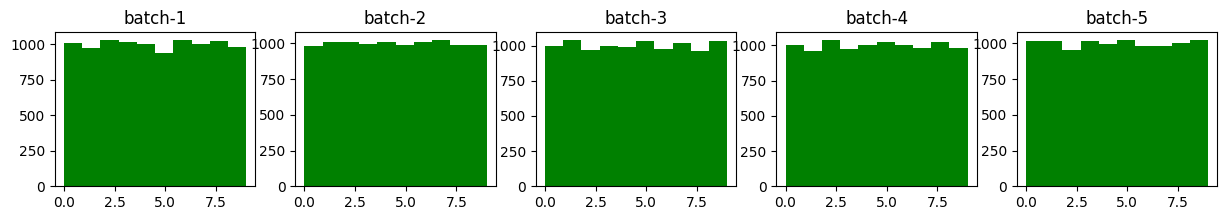

In [26]:
fig=plt.figure(figsize=(15, 2))
for i in range(1,6):
  plt.subplot(1, 5, i)
  plt.hist(batches[f'cifar10-batch-{i}']['labels'], color='green')
  plt.title(f'batch-{i}')

As it is clear from histograms, the distribution is balanced (not skewed).
The margins between classes, in each batch, look acceptable, so we would not face any problem related to imbalanced data.





## Training, Validation and Test Split Function

In [29]:
def load_data():

  # Training set
  train_x=np.zeros((40000, 32, 32, 3)).astype("float3")
  train_x[0:10000] = batches['cifar10-batch-1']['data']
  train_x[10000:20000] = batches['cifar10-batch-2']['data']
  train_x[20000:30000] = batches['cifar10-batch-3']['data']
  train_x[30000:40000] = batches['cifar10-batch-4']['data']

  train_y = np.zeros((40000))
  train_y[0:10000] = batches['cifar10-batch-1']['labels']
  train_y[10000:20000] = batches['cifar10-batch-2']['labels']
  train_y[20000:30000] = batches['cifar10-batch-3']['labels']
  train_y[30000:40000] = batches['cifar10-batch-4']['labels']

  # Validation set
  val_x = batches['cifar10-batch-5']['data']
  val_y = batches['cifar10-batch-5']['labels']

  # Test set
  test_x = batches['cifar10-test']['data']

  # Load labels
  label_to_names = {0: 'airplane', 1: 'automobile', 2: 'bird',
                    3: 'cat', 4: 'deer', 5: 'dog',
                    6: 'frog', 7: 'horse',8: 'ship',
                    9: 'truck'}

  print ("-----------------------------------------------------")
  print (label_to_names)
  print ("-----------------------------------------------------")
  print (f"> shape training set tensor: {train_x.shape}")
  print (f"> length training labels: {len(train_y)}")
  print ("-----------------------------------------------------")
  print (f"> shape validation set tensor: {val_x.shape}")
  print (f"> length training labels: {len(val_y)}")
  print ("-----------------------------------------------------")
  print (f"> shape test set tensor: {test_x.shape}")

  return train_x, train_y, val_x, val_y, test_x

## Build the ConvNet_Ver01